#TASK-1 : DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP
BY RAHUL DWIVEDI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rahulf9t/Task-1-GRIP/main/student_scores%20-%20student_scores.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#EXPLORING DATA

In [5]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#OUTLIER REMOVAL

In [10]:
def null_detection(data):
    num_cols = []

    count = 0
    t = []
    for i in num_cols:
        z = np.abs(stats.zscore(data[i]))
        for j in range(len(z)):
            if z[j]>3 or z[j]<-3:
                t.append(j)
                count+=1
    data = data.drop(list(set(t)))
    data = data.reset_index()
    data = data.drop('index', axis=1)
    print(count)
    return data

In [11]:
data=null_detection(data)

0


#DISTRIBUTION

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


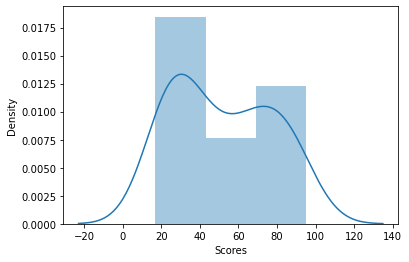

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


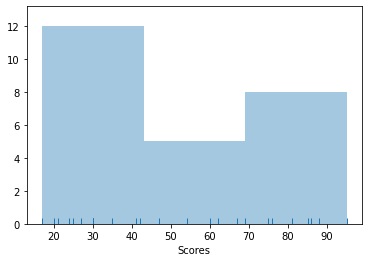

In [15]:
sns.distplot(data["Scores"])
plt.show()

sns.distplot(data["Scores"], kde=False, rug=True)
plt.show()


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'JointGrid' object has no attribute 'annotate'

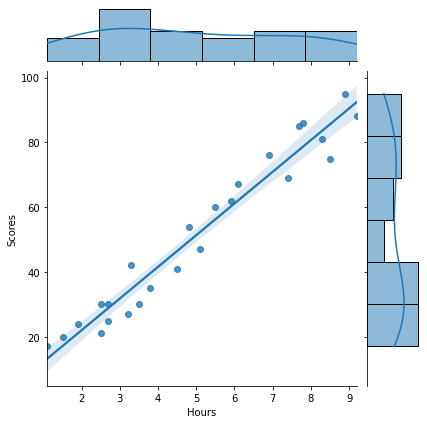

In [46]:
sns.jointplot(data['Hours'], data['Scores'], kind = "reg").annotate(stats.pearsonr)

plt.show()

#PERFORMING SIMPLE LINEAR REGRESSION
Calculating the coefficients of the simple linear regression equation: y = B0 + B1.x (B1: Slope, B0: Intercept)

In [18]:
mean_x = np.mean(data['Hours'])
mean_y = np.mean(data['Scores'])
num = 0
den = 0
x = list(data['Hours'])
y = list(data['Scores'])
for i in range(len(data)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den

In [19]:
B1

9.775803390787475

In [21]:
B0 = mean_y - B1*mean_x

In [22]:
B0

2.4836734053731746

#MAKING PREDICTIONS

In [23]:
data['predicted_Scores'] = B0 + B1*data['Hours']

In [24]:
data.head()

,Hours,Scores,predicted_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

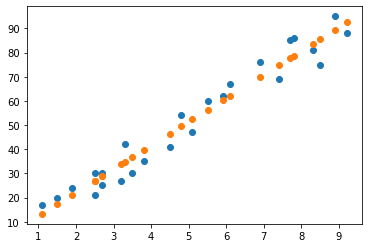

In [25]:
plt.scatter(data['Hours'], data['Scores'])
plt.scatter(data['Hours'], data['predicted_Scores'])
plt.plot()

#PREDICTION OF GIVEN VALUE 9.25

In [26]:
B0 + B1*9.25

92.90985477015732

In [27]:
y = list(data['Scores'].values)
y_pred = list(data['predicted_Scores'].values)

#RMSE

In [28]:
s = sum([(y_pred[i] - y[i])**2 for i in range(len(data))])
rmse = (np.sqrt(s/len(data)))/mean_y

In [29]:
rmse

0.10439521325937494

#OLS Model

In [30]:
model = smf.ols('Scores ~ Hours', data = data)
model = model.fit()

In [31]:
data['pred_ols'] = model.predict(data['Hours'])

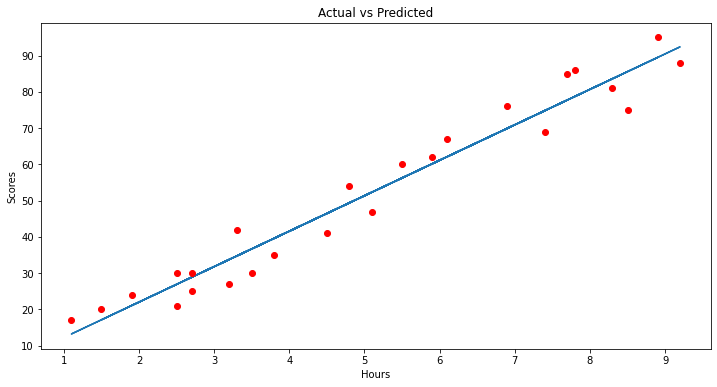

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(data['Hours'], data['pred_ols'])       # regression line
plt.plot(data['Hours'], data['Scores'], 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()


We can observe that the predicted value for 9.25 hours is around 92

#Additional Conclusions: Categorical Prediction

Consider a threshold to come to a conclusion whether the student passed or not!

Let's consider here 40 as the cut-off to pass.

In [33]:
cut_off = 40

In [34]:
data['Passed?'] = data['Scores']>=40

In [35]:
data.head()

,Hours,Scores,predicted_Scores,pred_ols,Passed?
0,2.5,21,26.923182,26.923182,False
1,5.1,47,52.340271,52.340271,True
2,3.2,27,33.766244,33.766244,False
3,8.5,75,85.578002,85.578002,True
4,3.5,30,36.698985,36.698985,False


#PLOTTING RESULTS OF THE GIVEN DATA

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passed?', ylabel='count'>

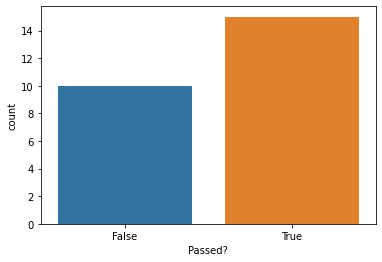

In [36]:
sns.countplot(data['Passed?'])

#FEATURE ENGINEERING

In [37]:
feature = data['Hours'].values.reshape(-1, 1)
target = data['Passed?'].values

#DATA SPLITTING

In [38]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=0)

#KNN Model Training

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
knn.score(X_train, y_train)

0.9444444444444444

In [41]:
knn.score(X_test, y_test)

0.8571428571428571

#PREDICTING OUTCOMES

In [42]:
get_results = [[9.25]]

In [43]:
knn.predict(get_results)

array([ True])

In [44]:
knn.predict([[14]])

array([ True])

In [45]:
knn.predict([[3]])

array([False])